In [12]:
# import the necessary packages
from __future__ import print_function
from PIL import Image
from PIL import ImageTk
import tkinter as tki
import threading
import datetime
import imutils
import cv2 
import os
import time
import numpy as np  

import matplotlib.pyplot as plt 

In [13]:
file = "data/20211030-npz/2021-10-30_18-37-16.npz"
filez = np.load(file)
filez.files

['arr_0', 'arr_1']

# Checking BMode image content

[[52 56 62 ... 30 52 55]
 [52 80 71 ... 67 47 47]
 [68 80 68 ... 59 51 43]
 ...
 [43 56 58 ... 47 45 52]
 [55 47 61 ...  0 58 51]
 [40 56 58 ... 36 56 47]]


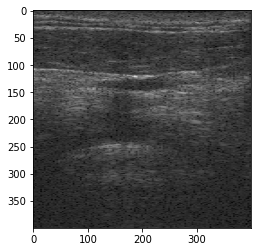

In [63]:
RF = filez["arr_0"]

img = np.sqrt(np.sqrt(np.abs(RF[:-2])).T[7:].T)
img = np.array(255*(img/np.max(img))).astype(np.uint8)
print(img) 
img = cv2.merge([img,img,img])
img = cv2.resize(img, (400,400), interpolation = cv2.INTER_AREA)

plt.imshow(img,cmap= "bone")



# Checking Doppler image content

In [75]:
DOP = filez["arr_1"]
DOP


array([[ 88,  88,  87, ..., -76, -74, -75],
       [-11, -11, -11, ..., -11, -11, -10],
       [-50, -51, -51, ...,  53,  53,  56],
       ...,
       [280, 281, 279, ...,   6,   3,   2],
       [-30, -23, -15, ...,  -8, -17, -23],
       [  0,   0,   0, ...,   0,   0,   0]])

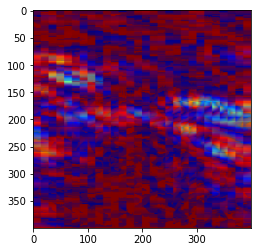

In [76]:
imgD = 128*(DOP/np.max(DOP))
imgD = cv2.applyColorMap(imgD.astype(np.uint8), cv2.COLORMAP_JET)
imgD = cv2.resize(imgD, (400,400), interpolation = cv2.INTER_AREA)

plt.imshow(imgD,cmap= "jet")

# Transforming the image

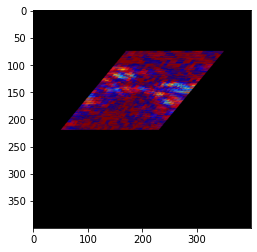

In [65]:
rows,cols,channels = imgD.shape;
pts1 = np.float32([[0,0],[0,400],[400,0]]);
pts2 = np.float32([[170,75],[30+20,220],[370-20,75]]);
M = cv2.getAffineTransform(pts1,pts2);
imgD_transformed = cv2.warpAffine(imgD,M,(cols,rows));
plt.imshow(imgD_transformed,cmap= "jet")

In [66]:
print(np.shape(img)),print(np.shape(imgD_transformed))

(400, 400, 3)
(400, 400, 3)


(None, None)

In [73]:
overlay = cv2.addWeighted(img, 0.8, imgD_transformed, 0.8, 0.0)

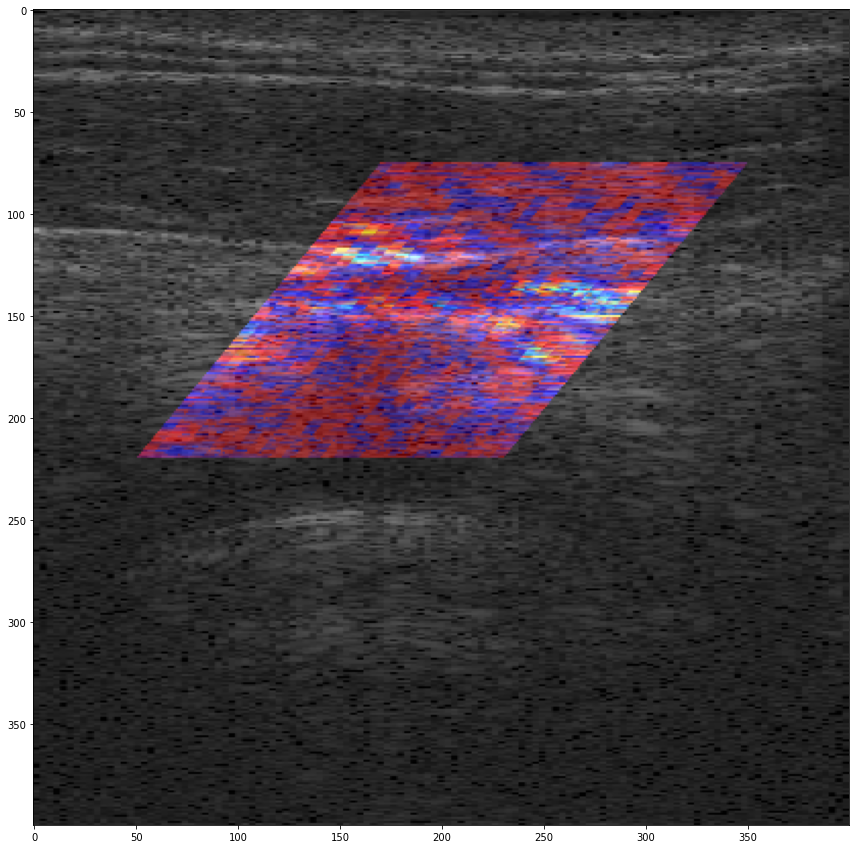

In [74]:
plt.figure(figsize=(15,15))
plt.imshow(overlay,cmap= "jet")